<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Regression" data-toc-modified-id="Regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Regression</a></span></li><li><span><a href="#ANOVA" data-toc-modified-id="ANOVA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>ANOVA</a></span></li><li><span><a href="#Dig-More" data-toc-modified-id="Dig-More-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Dig More</a></span></li></ul></div>

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import IPython as ip
mpl.style.use('ggplot')
mpl.rc('font', family='Noto Sans CJK TC')
ip.display.set_matplotlib_formats('svg')

## Regression

In [2]:
fair_df = sm.datasets.fair.load_pandas().data
display(
    fair_df.head(),
    fair_df.tail(),
    fair_df.dtypes,
)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.0
6365,4.0,22.0,2.5,0.0,2.0,16.0,2.0,4.0,0.0


rate_marriage      float64
age                float64
yrs_married        float64
children           float64
religious          float64
educ               float64
occupation         float64
occupation_husb    float64
affairs            float64
dtype: object

In [3]:
fair_df.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991


In [4]:
fair_r_df = pd.DataFrame(
    data=np.corrcoef(fair_df.T),
    columns=fair_df.columns,
    index=fair_df.columns
)

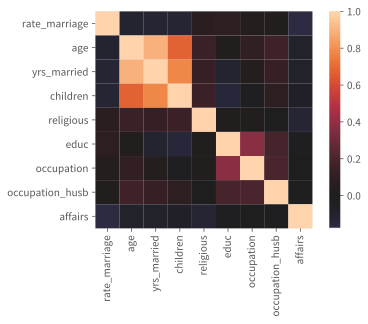

In [5]:
sns.heatmap(fair_r_df, center=0, square=True)

In [6]:
# more syntax like `~`: http://patsy.readthedocs.io/en/latest/formulas.html#the-formula-language
smf.ols('affairs ~ rate_marriage', fair_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                affairs   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     208.4
Date:                Sat, 21 Jul 2018   Prob (F-statistic):           1.66e-46
Time:                        21:20:40   Log-Likelihood:                -13959.
No. Observations:                6366   AIC:                         2.792e+04
Df Residuals:                    6364   BIC:                         2.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.3825      0.119     19.969      0.000       2.149       2.616
rate_marriage    -0.4081      0.028    -14.436      0.000      -0.464      -0.353
==============================================================================
Omnibus:                     9443.528   Durbin-Watson:                   1.606
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5215639.758
Skew:                           8.930   Prob(JB):                         0.00
Kurtosis:                     142.083   Cond. No.                         19.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
smf.ols('affairs ~ C(rate_marriage)', fair_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                affairs   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     58.57
Date:                Sat, 21 Jul 2018   Prob (F-statistic):           1.25e-48
Time:                        21:20:40   Log-Likelihood:                -13946.
No. Observations:                6366   AIC:                         2.790e+04
Df Residuals:                    6361   BIC:                         2.794e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   1.2017      0.218      5.524      0.000       0.775       1.628
C(rate_marriage)[T.2.0]     0.4141      0.247      1.679      0.093      -0.069       0.897
C(rate_marriage)[T.3.0]     0.1696      0.228      0.743      0.457      -0.278       0.617
C(rate_marriage)[T.4.0]    -0.5268      0.222     -2.370      0.018      -0.963      -0.091
C(rate_marriage)[T.5.0]    -0.8535      0.222     -3.853      0.000      -1.288      -0.419
==============================================================================
Omnibus:                     9436.269   Durbin-Watson:                   1.612
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5218576.884
Skew:                           8.915   Prob(JB):                         0.00
Kurtosis:                     142.127   Cond. No.                         21.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Overall**

* Df: degree of freedom.
* Prob (F-statistic): $P(\textit{the all coefficients are zeros})$.
* R-square:d 0 to 1, 1 indicates a best fit.
* Adj. R-squared: 0 to 1, adjusted for the number of explanatory variables.
* Log-Likelihood: lower is a better fit.
* AIC: Akaike information criterion; lower is a better fit.
* BIC: Bayesian information criterion; lower is a better fit.

**Terms**

* P>|t|: $P(\textit{the coefficient is zero})$.

**Residuals**

* Durbin-Watson: the test statistic for detecting autocorrelation.
* Prob(Omnibus): $P(\textit{the residuals are normally distributed by chi-squared test})$.
* Prob(JB): $P(\textit{the residuals are normally distributed by skewness and kurtosis})$.
* Cond. No.: condition number.

**R-squared**

<img style="float: left; width: 50%;" alt="Coefficient_of_Determination.svg" src="https://upload.wikimedia.org/wikipedia/commons/8/86/Coefficient_of_Determination.svg">
<p>$
R^{2} = 1 - \dfrac{
    \color{blue}{SS_{\text{res}}}
}{
    \color{red}{SS_{\text{tot}}}
}
$</p>
<p>$
\bar{R}^{2} = 1 - \dfrac{
    \color{blue}{SS_{\text{res}}} / \text{df}_{e}
}{
    \color{red}{SS_{\text{tot}}} / \text{df}_{t}
}
$</p>
<p>See also: https://en.wikipedia.org/wiki/Coefficient_of_determination .</p>

In [8]:
smf.ols('affairs ~ C(religious)', fair_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                affairs   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     35.75
Date:                Sat, 21 Jul 2018   Prob (F-statistic):           6.66e-23
Time:                        21:20:40   Log-Likelihood:                -14008.
No. Observations:                6366   AIC:                         2.802e+04
Df Residuals:                    6362   BIC:                         2.805e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.2470      0.068     18.231      0.000       1.113       1.381
C(religious)[T.2.0]    -0.4797      0.082     -5.824      0.000      -0.641      -0.318
C(religious)[T.3.0]    -0.7020      0.082     -8.608      0.000      -0.862      -0.542
C(religious)[T.4.0]    -1.0066      0.109     -9.204      0.000      -1.221      -0.792
==============================================================================
Omnibus:                     9285.668   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4607500.498
Skew:                           8.671   Prob(JB):                         0.00
Kurtosis:                     133.651   Cond. No.                         6.17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
smf.ols('affairs ~ rate_marriage * religious', fair_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                affairs   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     107.8
Date:                Sat, 21 Jul 2018   Prob (F-statistic):           4.55e-68
Time:                        21:20:40   Log-Likelihood:                -13904.
No. Observations:                6366   AIC:                         2.782e+04
Df Residuals:                    6362   BIC:                         2.784e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   4.6495      0.347     13.395      0.000       3.969       5.330
rate_marriage              -0.7891      0.082     -9.622      0.000      -0.950      -0.628
religious                  -0.9846      0.138     -7.122      0.000      -1.256      -0.714
rate_marriage:religious     0.1681      0.032      5.209      0.000       0.105       0.231
==============================================================================
Omnibus:                     9399.882   Durbin-Watson:                   1.615
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5196635.028
Skew:                           8.843   Prob(JB):                         0.00
Kurtosis:                     141.848   Cond. No.                         170.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
smf.ols('affairs ~ C(rate_marriage) * C(religious)', fair_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                affairs   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     19.95
Date:                Sat, 21 Jul 2018   Prob (F-statistic):           1.46e-66
Time:                        21:20:40   Log-Likelihood:                -13877.
No. Observations:                6366   AIC:                         2.779e+04
Df Residuals:                    6346   BIC:                         2.793e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                       1.3341      0.505      2.640      0.008       0.344       2.325
C(rate_marriage)[T.2.0]                         1.9654      0.581      3.384      0.001       0.827       3.104
C(rate_marriage)[T.3.0]                         1.0479      0.530      1.977      0.048       0.009       2.087
C(rate_marriage)[T.4.0]                        -0.3282      0.518     -0.633      0.527      -1.344       0.688
C(rate_marriage)[T.5.0]                        -0.6430      0.516     -1.246      0.213      -1.654       0.368
C(religious)[T.2.0]                             0.1143      0.619      0.185      0.853      -1.099       1.327
C(religious)[T.3.0]                            -0.3413      0.613     -0.556      0.578      -1.544       0.861
C(religious)[T.4.0]                            -0.6082      0.955     -0.637      0.524      -2.480       1.264
C(rate_marriage)[T.2.0]:C(religious)[T.2.0]    -1.8103      0.705     -2.569      0.010      -3.192      -0.429
C(rate_marriage)[T.3.0]:C(religious)[T.2.0]    -1.1905      0.648     -1.837      0.066      -2.461       0.080
C(rate_marriage)[T.4.0]:C(religious)[T.2.0]    -0.3499      0.634     -0.552      0.581      -1.592       0.893
C(rate_marriage)[T.5.0]:C(religious)[T.2.0]    -0.4682      0.632     -0.741      0.459      -1.707       0.770
C(rate_marriage)[T.2.0]:C(religious)[T.3.0]    -1.8707      0.704     -2.656      0.008      -3.252      -0.490
C(rate_marriage)[T.3.0]:C(religious)[T.3.0]    -0.9741      0.644     -1.511      0.131      -2.238       0.289
C(rate_marriage)[T.4.0]:C(religious)[T.3.0]    -0.1333      0.628     -0.212      0.832      -1.365       1.098
C(rate_marriage)[T.5.0]:C(religious)[T.3.0]    -0.0448      0.626     -0.072      0.943      -1.271       1.182
C(rate_marriage)[T.2.0]:C(religious)[T.4.0]    -2.2192      1.085     -2.045      0.041      -4.346      -0.092
C(rate_marriage)[T.3.0]:C(religious)[T.4.0]    -1.1008      1.002     -1.099      0.272      -3.064       0.863
C(rate_marriage)[T.4.0]:C(religious)[T.4.0]    -0.0946      0.975     -0.097      0.923      -2.005       1.816
C(rate_marriage)[T.5.0]:C(religious)[T.4.0]     0.0196      0.967      0.020      0.984      -1.876       1.915
==============================================================================
Omnibus:                     9360.488   Durbin-Watson:                   1.620
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5123160.759
Skew:                           8.770   Prob(JB):                         0.00
Kurtosis:                     140.865   Cond. No.                         128.
==============================================================================

Warnings:
[1] Standard Errors as

## ANOVA

ANOVA and linear regression are the same analysis.

In [11]:
# one-way anova
sm.stats.anova_lm(smf.ols('affairs ~ C(rate_marriage)', fair_df).fit(), typ=2)

,sum_sq,df,F,PR(>F)
C(rate_marriage),1097.674737,4.0,58.569573,1.254257e-48
Residual,29803.482809,6361.0,NaN,NaN


group1,group2,meandiff,lower,upper,reject
1.0,2.0,-0.4797,-0.6914,-0.268,True
1.0,3.0,-0.702,-0.9115,-0.4924,True
1.0,4.0,-1.0066,-1.2876,-0.7255,True
2.0,3.0,-0.2222,-0.3864,-0.0581,True
2.0,4.0,-0.5269,-0.7758,-0.2779,True
3.0,4.0,-0.3046,-0.5518,-0.0574,True


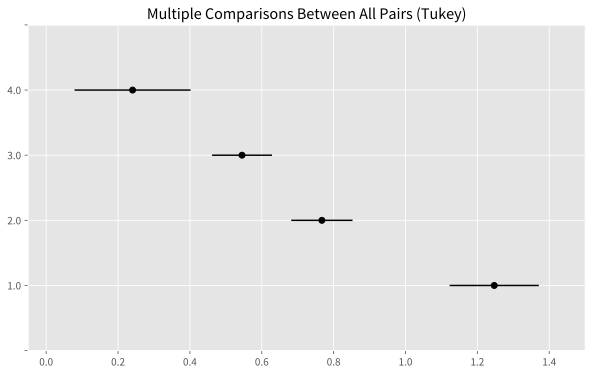

In [12]:
# post-hoc analysis
fair_mc = sm.stats.multicomp.MultiComparison(fair_df.affairs, fair_df.religious)
fair_mc_tukeyhsd_res = fair_mc.tukeyhsd()
display(fair_mc_tukeyhsd_res.summary())
_ = fair_mc_tukeyhsd_res.plot_simultaneous()

In [13]:
# one-way anova
sm.stats.anova_lm(smf.ols('affairs ~ C(religious)', fair_df).fit(), typ=2)

,sum_sq,df,F,PR(>F)
C(religious),512.267983,3.0,35.748251,6.664158e-23
Residual,30388.889563,6362.0,NaN,NaN


group1,group2,meandiff,lower,upper,reject
1.0,2.0,0.4141,-0.2587,1.0868,False
1.0,3.0,0.1696,-0.4529,0.7921,False
1.0,4.0,-0.5268,-1.1334,0.0797,False
1.0,5.0,-0.8535,-1.4579,-0.2491,True
2.0,3.0,-0.2445,-0.6124,0.1235,False
2.0,4.0,-0.9409,-1.2812,-0.6006,True
2.0,5.0,-1.2676,-1.6041,-0.9311,True
3.0,4.0,-0.6964,-0.9216,-0.4713,True
3.0,5.0,-1.0231,-1.2425,-0.8037,True
4.0,5.0,-0.3267,-0.4956,-0.1577,True


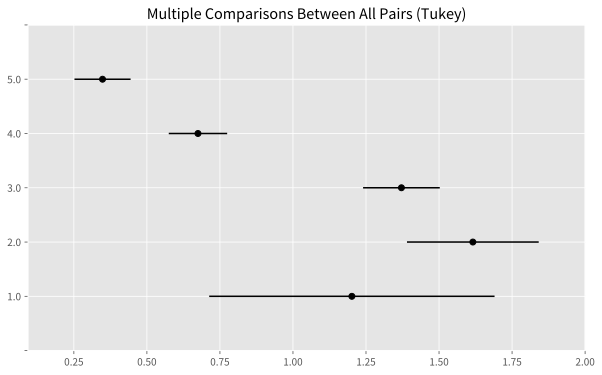

In [14]:
# post-hoc analysis
fair_mc = sm.stats.multicomp.MultiComparison(fair_df.affairs, fair_df.rate_marriage)
fair_mc_tukeyhsd_res = fair_mc.tukeyhsd()
display(fair_mc_tukeyhsd_res.summary())
_ = fair_mc_tukeyhsd_res.plot_simultaneous()

In [15]:
# two-way anova
sm.stats.anova_lm(smf.ols('affairs ~ C(rate_marriage) * C(religious)', fair_df).fit(), typ=2)

,sum_sq,df,F,PR(>F)
C(rate_marriage),1007.541192,4.0,54.817486,1.657790e-45
C(religious),422.134438,3.0,30.622865,1.199806e-19
C(rate_marriage):C(religious),221.600130,12.0,4.018880,3.024540e-06
Residual,29159.748241,6346.0,NaN,NaN


## Dig More

* [Linear regression – Wikipedia](https://en.wikipedia.org/wiki/Linear_regression)
* [Why ANOVA and Linear Regression are the Same Analysis – The Analysis Factor](https://www.theanalysisfactor.com/why-anova-and-linear-regression-are-the-same-analysis/)
* [anova_lm – StatsModels](http://www.statsmodels.org/stable/generated/statsmodels.stats.anova.anova_lm.html#statsmodels.stats.anova.anova_lm)